In [1]:
import numpy as np
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.set_cmap("tab20")

#presets for plot style
from scipy.constants import golden
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('axes', labelsize=18)
rc('legend', fontsize=18)

import matplotlib.patches as patches

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

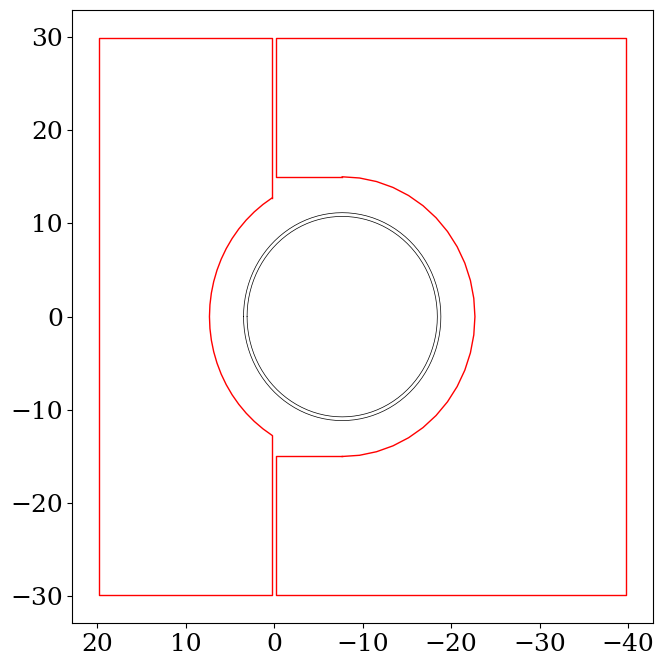

In [105]:
def drawHCalInsertLayer1():
    clearance = 3.85
    layer=0
    holeX =  -7.7  - 0.0569*layer
    beampipeX=holeX
    beampipeR=11.15 + 0.045*layer
    #holeR = 16.15 + 0.045*layer
    holeR=beampipeR+clearance
    z=380+2.34*layer+1.61+.2
    
    phi= np.linspace(0, 2*np.pi, 101)
    plt.plot(beampipeX+beampipeR*np.cos(phi), beampipeR*np.sin(phi), color='k', linewidth=0.5, zorder=100)
    plt.plot(beampipeX+(beampipeR-.4)*np.cos(phi), (beampipeR-.4)*np.sin(phi), color='k', linewidth=0.5, zorder=100)

    
    arg=dict(color='r', linewidth=1,zorder=100)
    #draw outline of sensor
    plt.plot([holeX,-.2,-.2,-39.8,-39.8, -.2, -.2, holeX], [-holeR,-holeR,-29.9, -29.9, 29.9, 29.9,holeR, holeR], 
             **arg)
    phi = np.linspace(-np.pi/2, np.pi/2, 25)
    plt.plot(holeX-np.cos(phi)*holeR, holeR*np.sin(phi), **arg)


    phi0 = np.arccos((holeX-.2)/holeR)
    plt.plot([.2,.2,19.8,19.8, .2, .2], [-holeR*np.sin(phi0),-29.9, -29.9, 29.9, 29.9, 
                                               holeR*np.sin(phi0)], **arg)
    phi = np.linspace(phi0,2*np.pi-phi0, 25)
    plt.plot(holeX-np.cos(phi)*holeR, holeR*np.sin(phi), **arg)
    
    #next label the z axis, beampipe center, and z* axis
    #plt.plot([0],[0], marker="s", zorder=100, color='b')
    #plt.text(0,0, " $z$", color='b', fontsize=17, horizontalalignment='left', zorder=100)
    
    #plt.plot([-z*.025],[0], marker='*', zorder=100, color='r')
    #plt.text(-z*.025,0, " $z^*$", color='r', fontsize=17, 
    #         horizontalalignment='left', zorder=100)
fig,axs = plt.subplots(1,1,figsize=(7,7))
drawHCalInsertLayer1()

plt.gca().invert_xaxis()
plt.show()

<ipython-input-333-285d874fffcd>:97: RuntimeWarning: invalid value encountered in sqrt
  plt.plot([x,x],[sign*np.ceil((np.sqrt(holeR**2-(x-holeX)**2))/5)*5, sign*np.ceil((np.sqrt(holeR**2-(np.floor(abs(x-holeX)/10)*10)**2))/10)*10], **arg)


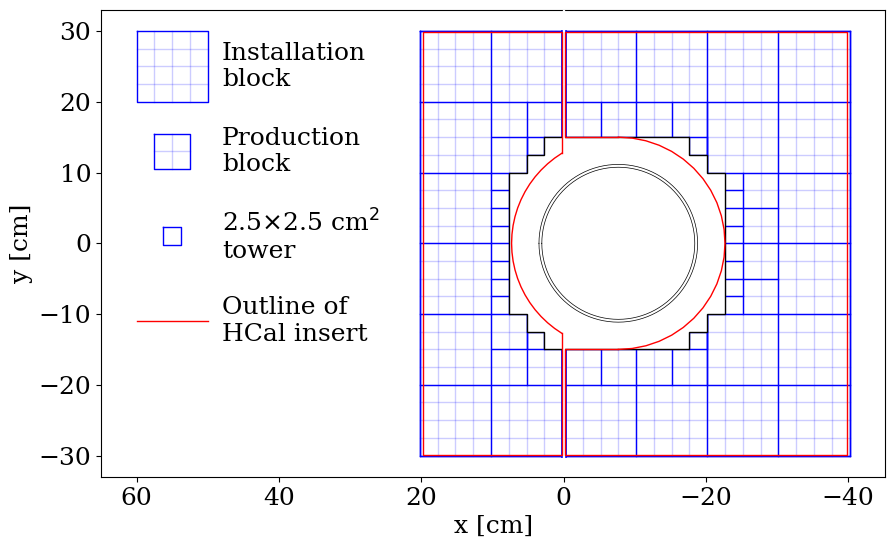

In [333]:
def drawECalInsert(drawInstallationUnits=False, include1pt25=False):
    clearance = 3.85
    layer=0
    holeX =  -7.7  - 0.0569*layer
    beampipeX=holeX
    beampipeR=11.15 + 0.045*layer
    #holeR = 16.15 + 0.045*layer
    holeR=beampipeR+clearance
    
    if drawInstallationUnits:
        arg=dict(color='b', linestyle='-', alpha=0.2, linewidth=1)
    else:
        arg=dict(color='0.5', linestyle='-', alpha=0.7, linewidth=1) 
    for y in np.linspace(-30,30, 25):
        if abs(y)>=holeR:
            plt.plot([-40.2, -0.2], [y,y],**arg)
            plt.plot([0.2, 20.2], [y,y],**arg)
        else:
            plt.plot([-40.2, np.floor(((holeX-np.sqrt(holeR**2-y**2))+.2)/2.5)*2.5-.2], [y,y], **arg)
            plt.plot([20.2, np.ceil(((holeX+np.sqrt(holeR**2-y**2))-.2)/2.5)*2.5+.2], [y,y], **arg)
    for x in np.linspace(-40, 20, 25):
        if x>0:
            x+=.2
        else :
            x-=.2
        if abs(x-holeX)>=holeR:
            plt.plot([x, x], [-30,30],**arg)
        else:
            plt.plot([x,x], [-30, -np.ceil((np.sqrt(holeR**2-(x-holeX)**2))/2.5)*2.5], **arg)
            plt.plot([x,x], [30, np.ceil((np.sqrt(holeR**2-(x-holeX)**2))/2.5)*2.5], **arg)
    
    if drawInstallationUnits:
        arg['alpha']=1
    if include1pt25:
        for x in np.linspace(-23.75, 10-2.5-1.25, 25):
            if x==-1.25 :
                continue
            if x==-22.5:
                plt.plot([x-.2,x-.2], [-10,10], **arg)
            else:
                x+=np.sign(x)*.2
                for sign in 1,-1:
                    plt.plot([x,x],[sign*np.ceil((np.sqrt(holeR**2-(x-holeX)**2))/1.25)*1.25, sign*np.ceil((np.sqrt(holeR**2-(np.floor(abs(x-holeX)/2.5)*2.5)**2))/2.5)*2.5], **arg)
        for y in np.linspace(-15+1.25, 15-1.25, 23):
            plt.plot([np.floor((holeX-np.sqrt(holeR**2-y**2)+.2)/1.25)*1.25-.2, np.floor((holeX-np.sqrt(holeR**2-(np.floor(abs(y)/2.5)*2.5)**2)+.2)/2.5)*2.5-.2], [y,y], **arg)
            plt.plot([max(np.ceil((holeX+np.sqrt(holeR**2-y**2)-.2)/1.25)*1.25+.2, 0), np.ceil((holeX+np.sqrt(holeR**2-(np.floor(abs(y)/2.5)*2.5)**2)-.2)/2.5)*2.5+.2], [y,y], **arg)
    
    #draw outline of hole
    
    x=np.linspace(-22.5, 7.5, 25 if include1pt25 else 13)
    xx = []
    yy = []
    for i in range(len(x)):
        minTowerSize = 1.25 if include1pt25 else 2.5
        if x[i]<-5:

            xx.append(x[i]-.2)
            xx.append(x[i]-.2)
            
            yy.append(np.ceil(np.sqrt(max(holeR**2-(x[i]-holeX-.2)**2,0))/minTowerSize)*minTowerSize)
            yy.append(np.ceil(np.sqrt(max(holeR**2-(x[i+1]-holeX-.2)**2,0))/minTowerSize)*minTowerSize)
        elif x[i]==0:
            xx.append(x[i]+.2)
            xx.append(x[i]+.2)
            yy.append(15)
            yy.append(np.ceil(np.sqrt(max(holeR**2-(x[i]-holeX)**2,0))/minTowerSize)*minTowerSize)
        elif x[i]>0:

            xx.append(x[i]+.2)
            xx.append(x[i]+.2)
            yy.append(np.ceil(np.sqrt(max(holeR**2-(x[i-1]-holeX+.2)**2,0))/minTowerSize)*minTowerSize)
            yy.append(np.ceil(np.sqrt(max(holeR**2-(x[i]-holeX+.2)**2,0))/minTowerSize)*minTowerSize)
    xx= list(xx)+list(reversed(xx))
    yy= list(yy)+list(reversed(np.multiply(yy,-1)))
    plt.fill(xx, yy, color='w', zorder=99, edgecolor='k', linewidth=1, linestyle='-')
    tweak=.5
    plt.axvspan(-.2*tweak, .2*tweak, color='w', zorder=99.5)
    
    col='k' if not drawInstallationUnits else 'b'
    plt.plot([.2,.2], [30, 13.75], color=col, linestyle='-', linewidth=2)
    plt.plot([-.2,-.2], [30, 15], color=col, linestyle='-', linewidth=2)
    plt.plot([.2,.2], [-30, -13.75], color=col, linestyle='-', linewidth=2)
    plt.plot([-.2,-.2], [-30, -15], color=col, linestyle='-', linewidth=2)
    
    if not drawInstallationUnits:
        arg['alpha']=1
        arg['color']='k'
        plt.plot([-40.2, 20.2, 20.2, -40.2,-40.2], [30,30, -30,-30, 30], **arg)
        for sign in -1,1:
            plt.plot([0,0], [sign*30, sign*15], **arg)
            
    
        return    
    for x in np.linspace(-25, 5, 7):
        x+=.2*np.sign(x)
        for sign in 1,-1:
            plt.plot([x,x],[sign*np.ceil((np.sqrt(holeR**2-(x-holeX)**2))/5)*5, sign*np.ceil((np.sqrt(holeR**2-(np.floor(abs(x-holeX)/10)*10)**2))/10)*10], **arg)
    for y in np.linspace(-15, 15, 7):
        if abs(y) == 15:
            plt.plot([10, -20], [y,y], **arg)
            continue
        plt.plot([np.floor((holeX-np.sqrt(holeR**2-y**2)+.2)/5)*5-.2, np.floor((holeX-np.sqrt(holeR**2-(np.floor(abs(y)/10)*10)**2)+.2)/10)*10-.2], [y,y], **arg)
        plt.plot([max(np.ceil((holeX+np.sqrt(holeR**2-y**2)-.2)/5)*5+.2, .2), np.ceil((holeX+np.sqrt(holeR**2-(np.floor(abs(y)/10)*10)**2)-.2)/10)*10+.2], [y,y], **arg)
    for x in np.linspace(-25, 7.5, 14):
        if x == 7.5 or x==-25:
            x+=.2*np.sign(x)
            plt.plot([x,x],[10, -10], **arg)
            continue
        x+=.2*np.sign(x)
        for sign in 1,-1:
            plt.plot([x,x],[sign*np.ceil((np.sqrt(holeR**2-(x-holeX)**2))/2.5)*2.5, sign*np.ceil((np.sqrt(holeR**2-(np.floor(abs(x-holeX)/5)*5)**2))/5)*5], **arg)
            
    for y in np.linspace(-12.5, 12.5, 11):
        plt.plot([np.floor((holeX-np.sqrt(holeR**2-y**2)+.2)/2.5)*2.5-.2, np.floor((holeX-np.sqrt(holeR**2-(np.floor(abs(y)/5)*5)**2)+.2)/5)*5-.2], [y,y], **arg)
        plt.plot([max(np.ceil((holeX+np.sqrt(holeR**2-y**2)-.2)/2.5)*2.5+.2, .2), np.ceil((holeX+np.sqrt(holeR**2-(np.floor(abs(y)/5)*5)**2)-.2)/5)*5+.2], [y,y], **arg)
                  
    #for x in np.linspace(-15+1.25, 15-1.25, 23):
    #    plt.plot([np.floor((holeX-np.sqrt(holeR**2-y**2))/1.25)*1.25, np.floor((holeX-np.sqrt(holeR**2-(np.floor(abs(y)/2.5)*2.5)**2))/2.5)*2.5], [y,y], **arg)
    #    plt.plot([max(np.ceil((holeX+np.sqrt(holeR**2-y**2))/1.25)*1.25, 0), np.ceil((holeX+np.sqrt(holeR**2-(np.floor(abs(y)/2.5)*2.5)**2))/2.5)*2.5], [y,y], **arg)
    
    
    for y in np.linspace(-30,30, 7):
        if abs(y)>=holeR:
            plt.plot([-40.2, 20.2], [y,y],**arg)
        else:
            plt.plot([-40.2, np.floor((holeX-np.sqrt(holeR**2-y**2)+.2)/10)*10-.2], [y,y], **arg)
            plt.plot([20.2, np.ceil((holeX+np.sqrt(holeR**2-y**2)-.2)/10)*10+.2], [y,y], **arg)
    for x in np.linspace(-40,20, 7):
        x = x +0.2*np.sign(x)
        if abs(x-holeX)>=holeR:
            plt.plot([x, x], [-30,30],**arg)
        else:
            plt.plot([x,x], [-30, -np.ceil((np.sqrt(holeR**2-(x-holeX)**2))/10)*10], **arg)
            plt.plot([x,x], [30, np.ceil((np.sqrt(holeR**2-(x-holeX)**2))/10)*10], **arg)
            
    plt.plot([20.2, -40.2, -40.2, 20.2, 20.2], [30, 30, -30,-30, 30], **arg)
    
    graphicalLegend=1
    if graphicalLegend:
        targ=dict(verticalalignment='center')
        arg['linewidth']=1 
        
        arg_thin=dict(color='b', linestyle='-', linewidth=1, alpha=0.2)
        y = 25
        dy=12
        plt.plot([60, 50, 50, 60, 60], [y+5, y+5, y-5,y-5, y+5], **arg)
        plt.text(48, y,"Installation\nblock",**targ)
        for yy in  y+2.5,y,y-2.5:
            plt.plot([60,50], [yy,yy], **arg_thin)
        for x in  52.5,55,57.5:
            plt.plot([x,x], [y-5,y+5], **arg_thin)
        y-=dy
        plt.plot([57.5, 52.5, 52.5, 57.5, 57.5], [y+2.5, y+2.5, y-2.5,y-2.5, y+2.5], **arg)
        plt.text(48, y,"Production\nblock",**targ)
        plt.plot([57.5, 52.5], [y,y], **arg_thin)
        plt.plot([55, 55], [y-2.5,y+2.5], **arg_thin)
        
        y-=dy
        plt.plot([56.25, 53.75, 53.75, 56.25, 56.25], [y+1.25, y+1.25, y-1.25,y-1.25, y+1.25], **arg)
        plt.text(48, y,"2.5$\\times$2.5 cm$^2$ \ntower",**targ)
        
        if include1pt25:
            y-=dy
            plt.plot([55.625, 54.375, 54.375, 55.625, 55.625], [y-.625, y-.625, y+.625,y+.625, y-.625], **arg)
            plt.text(48, y,"1.25$\\times$1.25 cm$^2$ \ntower",**targ)
        
#         for y in  22.5,25,27.5:
#             plt.plot([60,50], [y,y], **arg)
#         for x in  52.5,55,57.5:
#             plt.plot([x,x], [20,30], **arg)
#         plt.plot([57.5, 52.5], [10,10], **arg)
#         plt.plot([55, 55], [7.5,12.5], **arg)
        y-=dy
        plt.plot([50,60], [y,y], linestyle='-', linewidth=1, color='r')
        plt.text(48, y, "Outline of\nHCal insert",**targ)
fig,axs = plt.subplots(1,1,figsize=(10.84*6/7,6*261/269))
drawHCalInsertLayer1()
drawECalInsert(drawInstallationUnits=True)

plt.gca().invert_xaxis()

plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.savefig("plots/ecal_2d_layout.pdf")
plt.show()

In [326]:
beamTheta=-0.025
def eta_plot(clearance=3.85, z=380-17):
    beampipeR=11.15 + 0.045*((z-380)/2.34)
    holeR=15
    holeX=7.7
    beampipeX=7.7  - 0.0569*((z-380)/2.34)
    colors='tab:green tab:red tab:purple tab:brown tab:pink tab:gray tab:olive'.split()
    for i,eta in enumerate(reversed(np.linspace(3.2, 3.8,7))):
              
        ls = [ "-.", "-", (0, (3, 3, 1, 3, 1, 3)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 3, 1, 3)), (0, (5, 5)), (0,(3,1.4))][i]
        
        #for the legend
        a=plt.plot([],[], label= f"$\eta^*$={eta:.1f}", linestyle=ls, linewidth=3 if eta==3.7 else 2, color=colors[i])
        color= a[0].get_color()
        
        
        
        tanTheta=np.tan(2*np.arctan(np.exp(-eta)))
        phi= np.linspace(0, 2*np.pi, 100)
        uxp = tanTheta*np.cos(phi)
        uyp = tanTheta*np.sin(phi)
        uzp = 1
        
        ux = uxp*np.cos(beamTheta)+uzp*np.sin(beamTheta)
        uy = uyp
        uz = -uxp*np.sin(beamTheta)+uzp*np.cos(beamTheta)
        
        ux/=uz
        uy/=uz
        uz/=uz
        
        
        x,y = ux*z, uy*z
        plt.plot(x, y, color=color, linestyle=ls, marker='', linewidth=3 if eta==3.7 else 2)

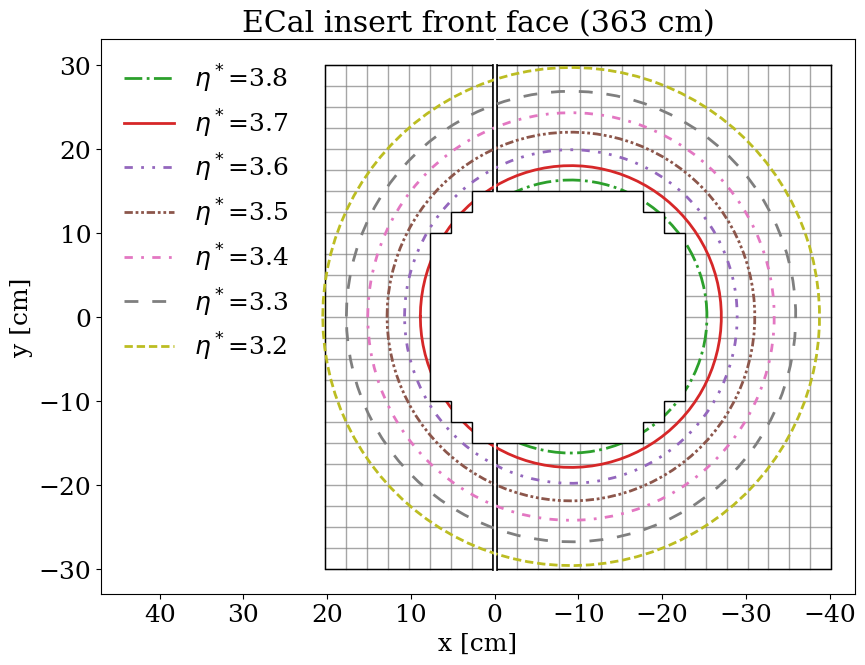

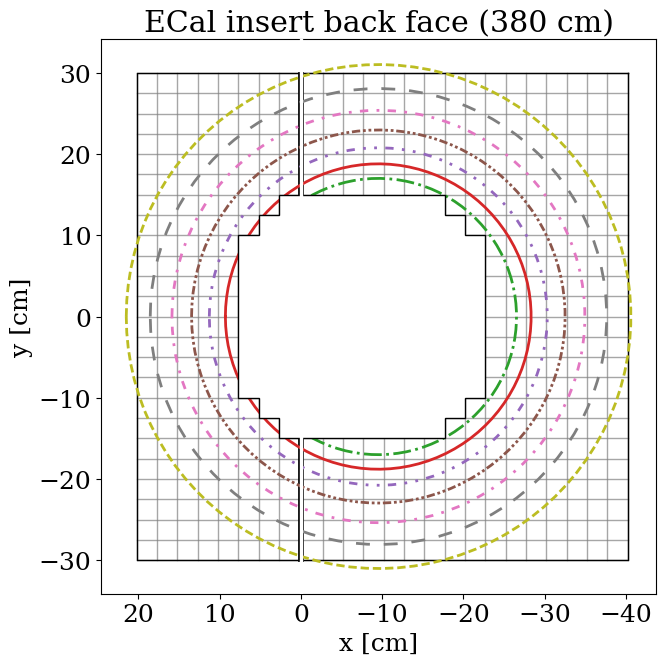

In [334]:
fig,axs= plt.subplots(1,1,figsize=(9,7))
drawECalInsert(drawInstallationUnits=False)
eta_plot(z=380-17)
plt.xlim(-43, 47)
plt.legend(loc='upper left', framealpha=0)
plt.gca().invert_xaxis()
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.title("ECal insert front face (363 cm)")
#plt.legend(loc='center', ncol=2, fontsize=12, zorder=100)
plt.savefig("plots/ecal_eta_acceptance_front.pdf")

plt.show()

fig,axs= plt.subplots(1,1,figsize=(7,7))
drawECalInsert(drawInstallationUnits=False)
eta_plot(z=380)
plt.gca().invert_xaxis()
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.title("ECal insert back face (380 cm)")
plt.savefig("plots/ecal_eta_acceptance_back.pdf")

plt.show()